In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

In [108]:
df = pd.read_csv('data-police-shootings/fatal-police-shootings-data.csv')
gendermask =  df['gender'].isnull()
racemask =  df['race'].isnull()
threatmask =  df['threat_level'].isnull() | (df['threat_level'] == 'other')
fleemask =  df['flee'].isnull()
armedmask = df['armed'].isnull()
agemask = df['age'].isnull()
nonthreatmask = ~(df['threat_level'].isnull()) | (df['threat_level'] == 'other')
clean_df = df[~gendermask & ~racemask & ~threatmask & ~fleemask & ~armedmask & ~agemask]
black_unarmed = clean_df[(clean_df['race'] == 'B') & (clean_df['armed'] == 'unarmed')]
white_unarmed = clean_df[(clean_df['race'] == 'W') & (clean_df['armed']== 'unarmed')]
asian_unarmed = clean_df[(clean_df['race'] == 'A') & (clean_df['armed']== 'unarmed')]
native_unarmed = clean_df[(clean_df['race'] == 'N') & (clean_df['armed']== 'unarmed')]
hispanic_unarmed = clean_df[(clean_df['race'] == 'H') & (clean_df['armed']== 'unarmed')]

black_armed = clean_df[(clean_df['race'] == 'B') & ~(clean_df['armed'] == 'unarmed')]

black_unarmed
clean_df = clean_df.drop(['longitude','latitude','is_geocoding_exact','name','id','city','state'], axis=1)
clean_df
pd.get_dummies(clean_df)
clean_df.describe()

#not armed mask 
# unarmed = ~(non_threat['armed'] == 'unarmed')
c = df.copy()[~gendermask & ~racemask & ~fleemask & ~armedmask & ~agemask]
non_threat = df[~gendermask & ~racemask & ~fleemask & ~armedmask & ~agemask]
non_threat = non_threat.drop(['longitude','latitude','is_geocoding_exact','name','id','city','state'], axis=1)
unarmed = ~(non_threat['armed'] == 'unarmed')
othermask = ~(non_threat['race'] == 'O')

non_threat_unarmed = non_threat[~non_threat['threat_level'].str.contains('attack')]
non_threat_unarmed = non_threat_unarmed[othermask]

non_threat_unarmed = non_threat_unarmed[~unarmed].reset_index(drop=True)

# non_threat.drop(['longitude','latitude','is_geocoding_exact','name','id','city','state'], axis=1)
# clean_df[~clean_df['threat_level'].str.contains('attack')].reset_index(drop=True)
c[~c['threat_level'].str.contains('attack')].reset_index(drop=True)

non_threat_unarmed.insert(0,'deaths', range(1,len(non_threat_unarmed)+1))
non_threat_unarmed['deaths1'] = (non_threat_unarmed['race'] != non_threat_unarmed['race'].shift(1)).cumsum()
non_threat_unarmed['y'] = non_threat_unarmed.groupby('race').cumcount()+1
len(non_threat_unarmed)
# non_threat_unarmed.index = non_threat_unarmed.index + 1
non_threat_unarmed.to_csv('non_threat_unarmed.csv')
non_threat_unarmed.dtypes
races = ['H','W','B','A','N','O']
    

# clean_df
# df2.reset_index(drop=True)
# df[threatmask]

/tmp/ipykernel_1337441/3169092363.py:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  non_threat_unarmed = non_threat_unarmed[othermask]
/tmp/ipykernel_1337441/3169092363.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  non_threat_unarmed = non_threat_unarmed[~unarmed].reset_index(drop=True)


In [109]:
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
clean_df['date'] = pd.to_datetime(clean_df['date'])
type(clean_df['date'])
type(clean_df['date'].loc[0])
clean_df.dtypes
start = '2015-01-01'
end = '2018-01-01'
cond = (clean_df['date'] > start) & (df['date'] <= end)
clean_df.loc[cond]
#clean_df['age'].describe()

,date,manner_of_death,armed,age,gender,race,signs_of_mental_illness,threat_level,flee,body_camera
0,2015-01-02,shot,gun,53.0,M,A,True,attack,Not fleeing,False
1,2015-01-02,shot,gun,47.0,M,W,False,attack,Not fleeing,False
3,2015-01-04,shot,toy weapon,32.0,M,W,True,attack,Not fleeing,False
4,2015-01-04,shot,nail gun,39.0,M,H,False,attack,Not fleeing,False
5,2015-01-04,shot,gun,18.0,M,W,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...
2926,2017-12-28,shot,gun,30.0,M,B,False,attack,Car,False
2928,2017-12-30,shot,gun,31.0,M,H,False,attack,Not fleeing,False
2933,2018-01-01,shot,gun,65.0,M,W,True,attack,Not fleeing,False
2934,2018-01-01,shot,gun,42.0,M,W,False,attack,Not fleeing,False


In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# clean_df.corr(method='pearson')
print(clean_df.corr())
clean_df.dtypes
clean_df['manner_of_death'] = clean_df['manner_of_death'].astype('str')
clean_df['gender'] = clean_df['gender'].astype('str')
clean_df['race'] = clean_df['race'].astype('str')
clean_df['armed'] = clean_df['armed'].astype('str')
clean_df['flee'] = clean_df['flee'].astype('str')
clean_df['threat_level'] = clean_df['threat_level'].astype('str')
# clean_df['death_by']
clean_df

                              age  signs_of_mental_illness  body_camera
age                      1.000000                 0.113387    -0.034553
signs_of_mental_illness  0.113387                 1.000000     0.050976
body_camera             -0.034553                 0.050976     1.000000


,date,manner_of_death,armed,age,gender,race,signs_of_mental_illness,threat_level,flee,body_camera
0,2015-01-02,shot,gun,53.0,M,A,True,attack,Not fleeing,False
1,2015-01-02,shot,gun,47.0,M,W,False,attack,Not fleeing,False
3,2015-01-04,shot,toy weapon,32.0,M,W,True,attack,Not fleeing,False
4,2015-01-04,shot,nail gun,39.0,M,H,False,attack,Not fleeing,False
5,2015-01-04,shot,gun,18.0,M,W,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...
7174,2022-03-11,shot,gun,42.0,M,B,False,attack,Not fleeing,False
7175,2022-03-12,shot,gun,33.0,M,W,False,attack,Car,False
7199,2022-03-19,shot,knife,34.0,M,B,True,attack,Not fleeing,True
7217,2022-03-26,shot,scissors,29.0,M,W,False,attack,Not fleeing,True


In [111]:
pd.get_dummies(clean_df['race'].head(10))
X = clean_df[['race','gender','age']]
Y = clean_df['armed']

In [112]:
non_threat_unarmed.shape

(240, 13)

In [113]:
non_threat_unarmed.head()

,deaths,date,manner_of_death,armed,age,gender,race,signs_of_mental_illness,threat_level,flee,body_camera,deaths1,y
0,1,2015-01-03,shot and Tasered,unarmed,23.0,M,H,False,other,Not fleeing,False,1,1
1,2,2015-01-06,shot,unarmed,34.0,F,W,False,other,Not fleeing,True,2,1
2,3,2015-01-26,shot,unarmed,24.0,M,H,False,other,Car,False,3,2
3,4,2015-01-29,shot,unarmed,42.0,M,W,False,other,Foot,False,4,2
4,5,2015-02-02,shot and Tasered,unarmed,59.0,M,W,False,other,Foot,False,4,3


In [114]:
sns.set_style('dark')

<AxesSubplot:>

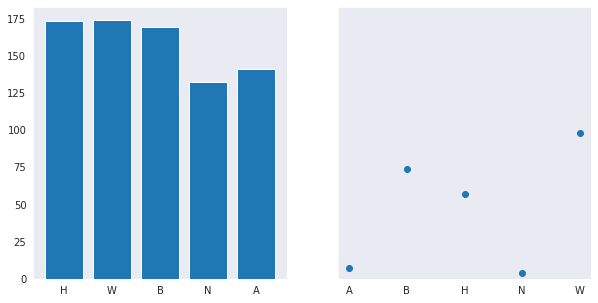

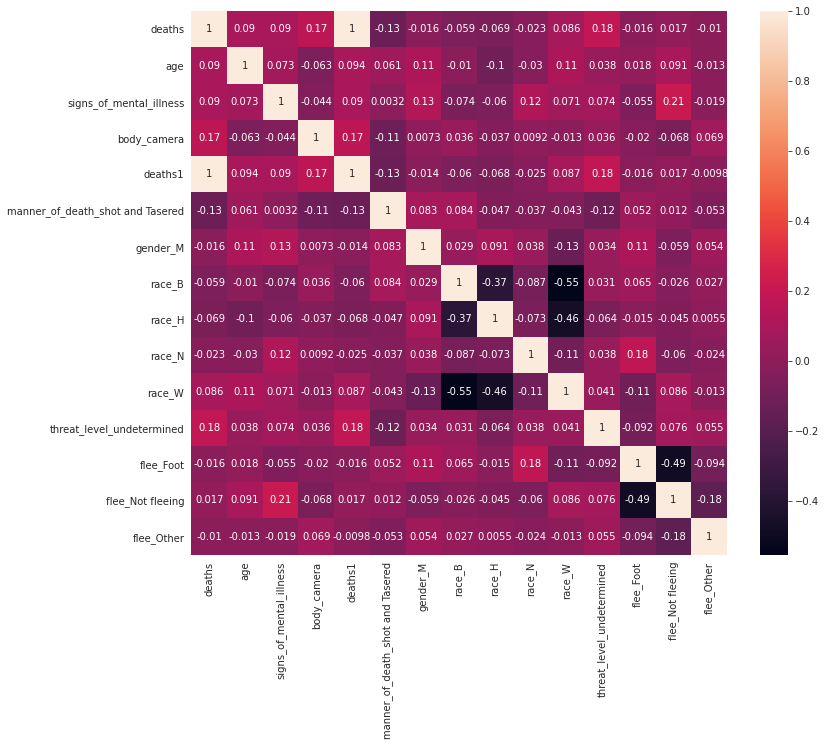

In [131]:
fig, ax = plt.subplots(1, 2, figsize=(10,5), sharey=True)
races = ['A','B','H','N','W',]
y = non_threat_unarmed.groupby(['race']).deaths.count()
x = pd.Series(races)

# ax[0].bar(x,y)
# ax[1].scatter(x,y)
ax[0].bar(non_threat_unarmed.race,non_threat_unarmed.deaths1)
ax[1].scatter(x,y)

u = non_threat_unarmed.drop(['date'],axis=1)


non_threat_unarmed
u = pd.get_dummies(u,drop_first=True)
u.corr()
plt.figure(figsize=(12,10))
u_x = u.drop('y',axis=1)
u_y = u.y
sns.heatmap(u_x.corr(),annot = True)

# x_train, x_test, y_train, y_test = test_train_split()
    

In [153]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

reg = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(u_x,u_y, train_size = .8, random_state = 4)
reg.fit(x_train,y_train)
reg.coef_
reg.predict(x_test)
y_train
# plt.scatter(x_train, y_train, color = "red")
# plt.plot(x_train, reg.predict(x_train), color = "green")
# plt.title("Unarmed deaths by police")
# plt.xlabel('race')
# plt.ylabel("deaths")
# plt.show()
# logisticRegr = LogisticRegression()

134    44
219    69
81     31
34     13
229    93
       ..
129    42
197    61
183    73
174    44
122    46
Name: y, Length: 192, dtype: int64

In [26]:
white_deaths = len(clean_df[clean_df['race'].str.contains('W')])
black_deaths = len(clean_df[clean_df['race'].str.contains('B')])
native_deaths = len(clean_df[clean_df['race'].str.contains('N')])
asian_deaths = len(clean_df[clean_df['race'].str.contains('A')])
hispanic_deaths = len(clean_df[clean_df['race'].str.contains('H')])
total_deaths = len(clean_df['race'])
white_deaths
black_deaths
native_deaths
asian_deaths
hispanic_deaths
total_deaths
mask15 = (non_threat_unarmed['date'] > '2015-01-01' ) & (non_threat_unarmed['date'] < '2016-01-01')
mask16 = (non_threat_unarmed['date'] > '2016-01-01' ) & (non_threat_unarmed['date'] < '2017-01-01')
mask17 = (non_threat_unarmed['date'] > '2017-01-01' ) & (non_threat_unarmed['date'] < '2018-01-01')
mask18 = (non_threat_unarmed['date'] > '2018-01-01' ) & (non_threat_unarmed['date'] < '2019-01-01')
mask19 = (non_threat_unarmed['date'] > '2019-01-01' ) & (non_threat_unarmed['date'] < '2020-01-01')
mask20 = (non_threat_unarmed['date'] > '2020-01-01' ) & (non_threat_unarmed['date'] < '2021-01-01')
mask21 = (non_threat_unarmed['date'] > '2021-01-01' ) & (non_threat_unarmed['date'] < '2022-06-01')

print(len(non_threat_unarmed[mask15]))
print(len(non_threat_unarmed[mask16]))
print(len(non_threat_unarmed[mask17]))
print(len(non_threat_unarmed[mask18]))
print(len(non_threat_unarmed[mask19]))
print(len(non_threat_unarmed[mask20]))
print(len(non_threat_unarmed[mask21]))



58
39
40
32
34
30
10


# Creating design weight

In [ ]:
designW = white_deaths/total_deaths
designB = black_deaths/total_deaths
designN = native_deaths/total_deaths
designA = asain_deaths/total_deaths
designH = hispanic_deaths/total_deaths